In [5]:
# Data Preprocessing

import pandas as pd
import numpy as np

# Load the customer and transaction data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Data Merging (assuming both datasets have 'CustomerID' for joining)
data = pd.merge(customers, transactions, on='CustomerID', how='inner')

# Feature Engineering:
# - Calculate the total amount spent per customer
data['Total_Spent'] = data.groupby('CustomerID')['Price'].transform('sum')

# - Calculate the transaction frequency (number of transactions per customer)
data['Transaction_Frequency'] = data.groupby('CustomerID')['TransactionID'].transform('count')

# Optionally, select other relevant features like 'Age', 'Income', etc.
# Make sure to remove duplicates (in case multiple rows per customer due to transactions)
data = data.drop_duplicates(subset=['CustomerID'])

# Select relevant columns for clustering
features = data[['Total_Spent', 'Transaction_Frequency']]  # Add more columns if necessary

# Show a preview of the data to check
print(features.head())


    Total_Spent  Transaction_Frequency
0       1391.67                      5
5        835.68                      4
9        782.83                      4
13      1925.09                      8
21       874.81                      3


In [6]:
# Data Normalization

from sklearn.preprocessing import StandardScaler

# Normalize the features (important for clustering algorithms)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Check the scaled features (first 5 rows)
print(features_scaled[:5])


[[ 0.03332559 -0.01145819]
 [-0.80691867 -0.46749414]
 [-0.88678865 -0.46749414]
 [ 0.83946076  1.35664965]
 [-0.74778315 -0.92353008]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


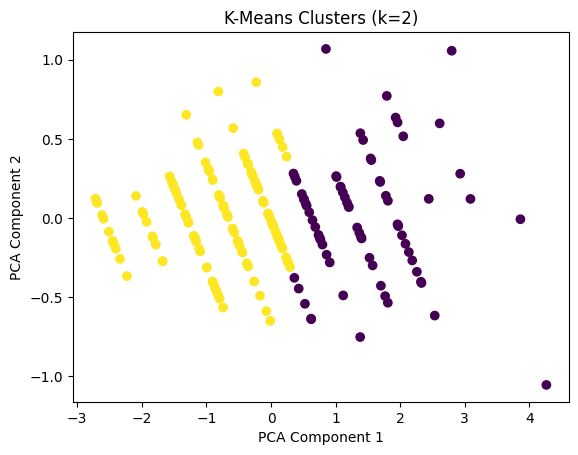

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


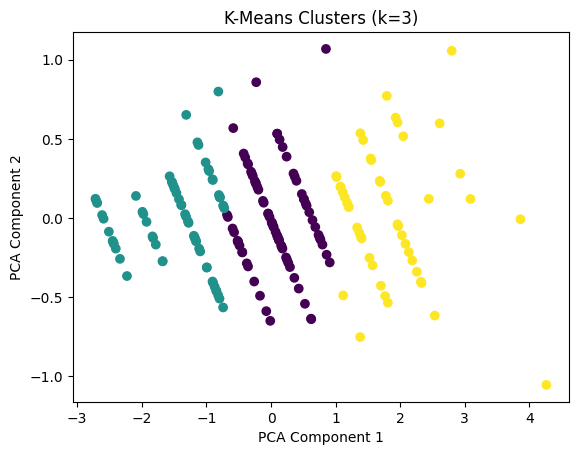

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


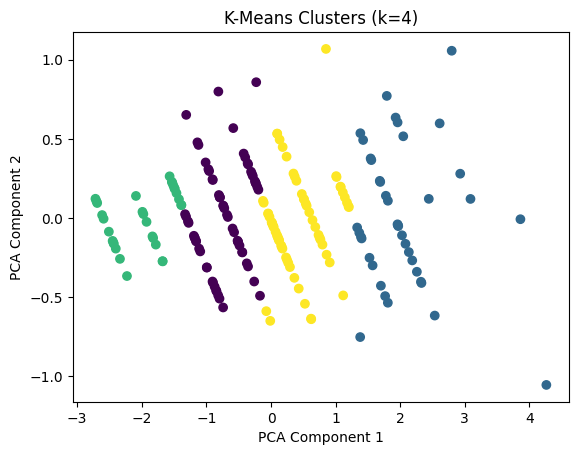

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


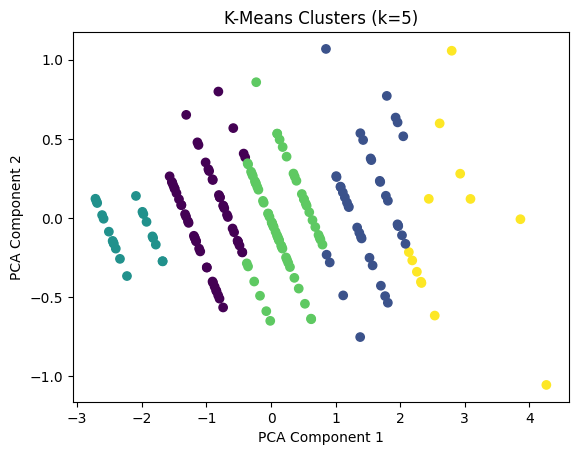

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


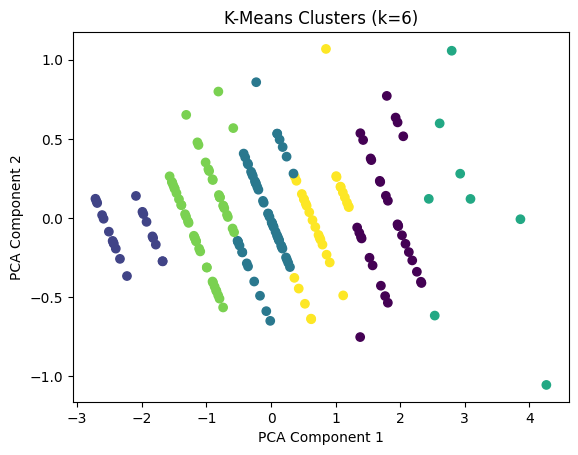

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


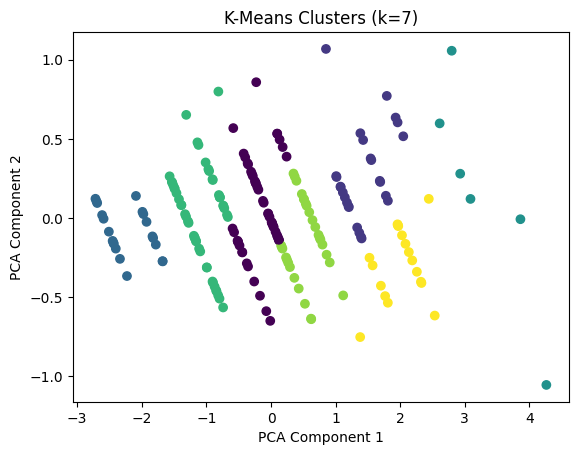

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


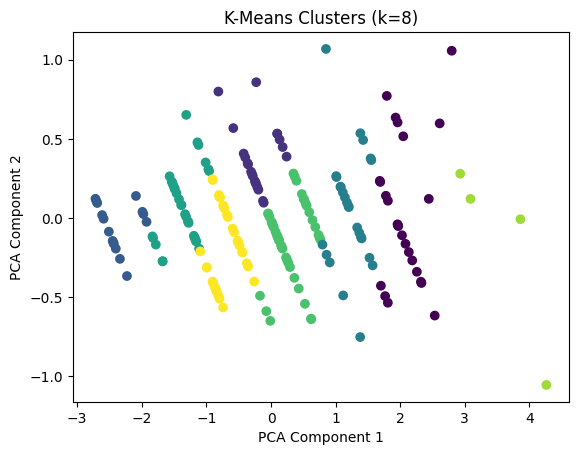

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


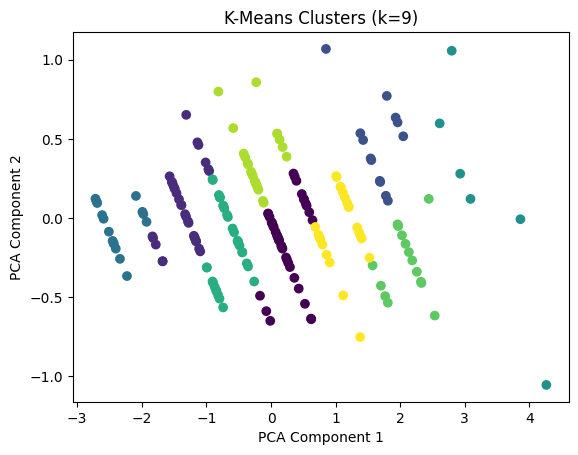

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


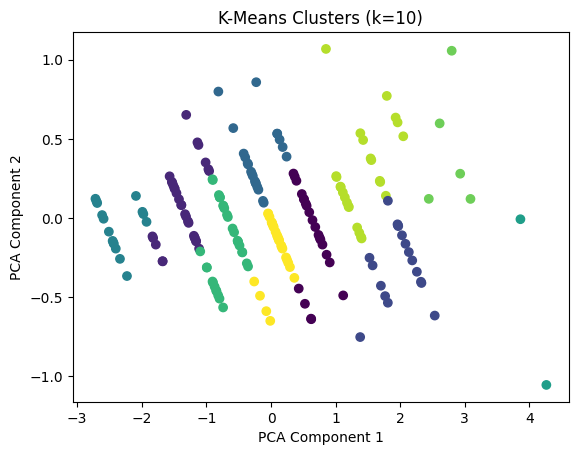

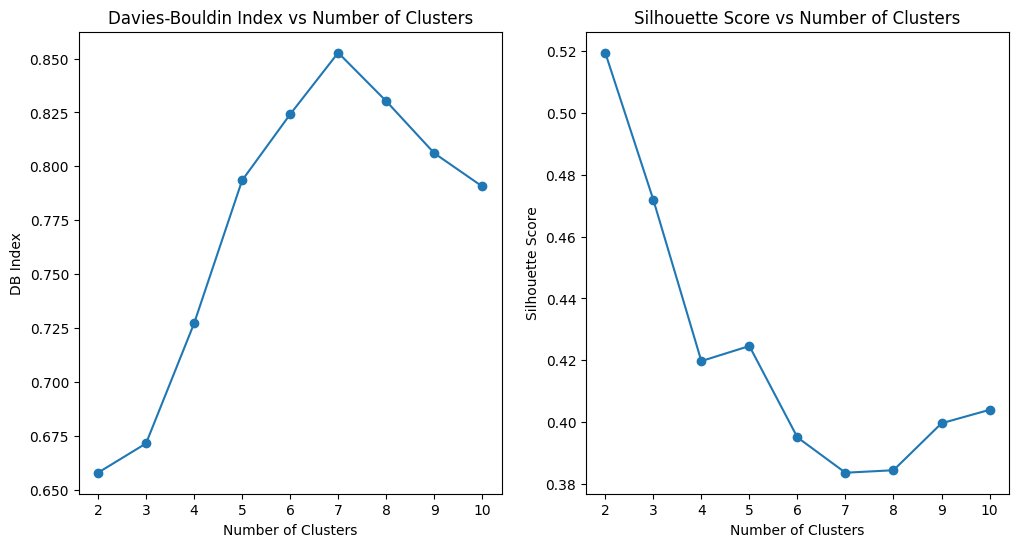

In [7]:
#K-Means Clustering and Evaluation

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

sil_scores = []  # List to store Silhouette Scores for each k
db_indices = []  # List to store DB Index values for each k

# Try K-Means Clustering (k = 2 to 10)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    
    # Calculate Davies-Bouldin Index (lower is better)
    db_index = davies_bouldin_score(features_scaled, kmeans.labels_)
    db_indices.append(db_index)
    
    # Calculate Silhouette Score (higher is better)
    sil_score = silhouette_score(features_scaled, kmeans.labels_)
    sil_scores.append(sil_score)
    
    # Visualize the clusters using PCA for dimensionality reduction (2D plot)
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(features_scaled)
    
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.title(f'K-Means Clusters (k={k})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Plot evaluation metrics (DB Index and Silhouette Score)
plt.figure(figsize=(12, 6))

# Plot DB Index
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), db_indices, marker='o')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.show()
